# IoT Stream Zeiss 2022

This notebook is about storing and accessing data to/from a SQL database that is hosted on Azure. You will be guided through some examples. Afterwards you apply the learned to your use-case.

Explanation of terms:

**Azure:** Azure is the cloud service from Microsoft. A similar cloud service is AWS from Amazon.
<br>
**Azure Database:** We use a relational Database on Azure (PostgreSQL - Single Server) to store the collected data. A relational database is a collection of data items with pre-defined relationships between them. These items are organized as a set of tables with columns and rows. Tables are used to hold information about the objects to be represented in the database.
<br>
**SQL:** SQL is a standard language for storing, manipulating and retrieving data in databases. We will use it to communicate with our database.
<br>The SQL commands can be executed with `cursor.execute( SQLcommand )`

**For SQL basics see Notebook 00_Basics.ipynb**

**Steps overview:**
<br>&emsp; `Step 1: Setup`
<br>&emsp;&emsp; - import libraries that you need for your program
<br>&emsp;&emsp; - create a connection to your database
<br>&emsp; `Step 2: Collection`
<br>&emsp;&emsp; - create a table in your database
<br>&emsp;&emsp; - collect and store data into your database
<br>&emsp; `Step 3: Visualization`
<br>&emsp;&emsp; - access the data in the database
<br>&emsp;&emsp; - create plots of the data
<br>&emsp; `Step 4: Your use-case`
<br>&emsp;&emsp; - set up a table according to your use-case requirements
<br>&emsp;&emsp; - collect data for your use-case and store it in the database
<br>&emsp; `Step 5: Close the connection to the database`
<br>&emsp;&emsp; - after all the work you just have to close the connection to your database

# Step 1: Setup

Install required package:

In [1]:
!pip install psycopg2_binary # version for macos
!pip install pandas

Import the needed libraries:

In [25]:
import psycopg2
import pandas as pd
import time
import random
from datetime import datetime
from datetime import timezone
from time import strftime, gmtime

The connect() function creates a new database session and returns a new instance of connection. To build a connection, you need the following data:

- Username
- Password
- Host Name: This is the server name or Ip address on which databse is running
- Database Name: Database name to which you want to connect
- Port 

The cursor allows interaction with the database:

- send commands to the database using execute() and executemany() methods.
- retrieve data from the database using methods such as fetchone(), fetchmany(), fetchall(), or by iteration.

In [49]:
# create connection
conn = psycopg2.connect(dbname='postgres', 
                        user='nimda@iot-zeiss-2504', 
                        host='iot-zeiss-2504.postgres.database.azure.com', 
                        password='leadml-2022', 
                        port='5432', 
                        sslmode='require')

# create cursor
cursor = conn.cursor()
print("Connection established")

Connection established


If you receive the message "urrent transaction is aborted, commands ignored until end of transaction block", then you have to start a new connection/cursor.

# Step 2: Collection

### Drop previous table of same name if one exists

In case you want to start over, you can delete your table

**Important:**

WITH THIS COMMAND YOU PERMANENTLY DELETE THE TABLE, MAKE SURE YOU ONLY DELETE THE TABLE YOU CREATED!!!

In [50]:
# ONLY RUN THIS CELL IN CASE YOU WANT TO DELETE YOUR TABLE

cursor.execute("DROP TABLE IF EXISTS test_group_0;")

print("Finished dropping table (if existed)")

Finished dropping table (if existed)


### Create a table

**Please note:**

In the tutorial you will create a table named `test_group_0`. Please replace the zero by the number of your group.

Examples of columns of the table:
<br>&emsp;    `id` is our primary key and will be increased automatically (natural number, first datapoint has id=0)
<br>&emsp;    `air_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `sound_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `temperature_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `date` is the date of the creation of the datapoint (form: 'year-month-day')
<br>&emsp;    `time` is the time of creation of the datapoint (form: '00:00:00')

In [51]:
cursor.execute("""
CREATE TABLE test_group_0 (
    id SERIAL PRIMARY KEY, 
    name_column1 FLOAT8, 
    name_column2 FLOAT8, 
    name_column3 FLOAT8, 
    date DATE, 
    time TIME
    );
""")
           
print("Finished creating table")

Finished creating table


### Collect and insert data into the table

In [8]:
# This is a helping function to generate random example values representing sensors data. 
# You only need it for demonstration purpose
# Running the cell will create this function, but not execute it

def collect_data():
    data_source_1 = random.randint(0,100)
    data_source_2 = random.randint(0,100)
    data_source_3 = random.randint(0,100)
    
    return data_source_1, data_source_2, data_source_3

In [52]:
# set counter i to 1
i = 1

# collect 10 data points
while i<=10:    
    # get 'fake' sensor value from collect_data function
    data_source_1, data_source_2, data_source_3 = collect_data()
    
    # assign date and time
    datetime_value = strftime("%Y-%m-%d %H:%M:%S", gmtime())
    date_value = datetime.today().strftime("%Y-%m-%d")
    time_value = datetime.today().strftime("%H:%M:%S")
    
    # insert data into the database (don't forget to replace "test_group_0" with your group number)
    cursor.execute("""
    INSERT INTO test_group_0 (
        name_column1, 
        name_column2, 
        name_column3,
        date, 
        time) 
    VALUES (%s, %s, %s, %s, %s);""", (data_source_1, data_source_2, data_source_3, date_value, time_value))
    
    print(f"i = {i} \t data_source_1 = {data_source_1} \t data_source_2 = {data_source_2} \t data_source_3 = {data_source_3} \t date_value = {date_value} \t time_value = {time_value}")
    
    # wait for 1 second and increase counter i by 1
    time.sleep(1)
    i += 1
    

i = 2 	 data_source_1 = 73 	 data_source_2 = 25 	 data_source_3 = 13 	 date_value = 2022-05-10 	 time_value = 19:52:36
i = 3 	 data_source_1 = 26 	 data_source_2 = 13 	 data_source_3 = 68 	 date_value = 2022-05-10 	 time_value = 19:52:38
i = 4 	 data_source_1 = 87 	 data_source_2 = 79 	 data_source_3 = 7 	 date_value = 2022-05-10 	 time_value = 19:52:39
i = 5 	 data_source_1 = 45 	 data_source_2 = 91 	 data_source_3 = 98 	 date_value = 2022-05-10 	 time_value = 19:52:40
i = 6 	 data_source_1 = 52 	 data_source_2 = 90 	 data_source_3 = 22 	 date_value = 2022-05-10 	 time_value = 19:52:41
i = 7 	 data_source_1 = 26 	 data_source_2 = 70 	 data_source_3 = 84 	 date_value = 2022-05-10 	 time_value = 19:52:42
i = 8 	 data_source_1 = 9 	 data_source_2 = 63 	 data_source_3 = 95 	 date_value = 2022-05-10 	 time_value = 19:52:43
i = 9 	 data_source_1 = 57 	 data_source_2 = 16 	 data_source_3 = 40 	 date_value = 2022-05-10 	 time_value = 19:52:44
i = 10 	 data_source_1 = 81 	 data_source_2 = 14 	

# Step 3: Visualization

### Read data from database

In [53]:
# Fetch all rows from table (here 'inventory')
cursor.execute("""
    SELECT 
        name_column1, 
        name_column2, 
        name_column3,
        date, 
        time 
    FROM test_group_0;
    """)
    

rows = cursor.fetchall()
    
# Create DataFrame with rows
df = pd.DataFrame(rows, columns=["name_column1", "name_column2", "name_column3", "date", "time"])

# show the first 10 rows of it
df.head(10)

,name_column1,name_column2,name_column3,date,time
0,73.0,25.0,13.0,2022-05-10,19:52:36
1,26.0,13.0,68.0,2022-05-10,19:52:38
2,87.0,79.0,7.0,2022-05-10,19:52:39
3,45.0,91.0,98.0,2022-05-10,19:52:40
4,52.0,90.0,22.0,2022-05-10,19:52:41
5,26.0,70.0,84.0,2022-05-10,19:52:42
6,9.0,63.0,95.0,2022-05-10,19:52:43
7,57.0,16.0,40.0,2022-05-10,19:52:44
8,81.0,14.0,83.0,2022-05-10,19:52:45
9,31.0,63.0,49.0,2022-05-10,19:52:46


### Plot data 

<AxesSubplot:>

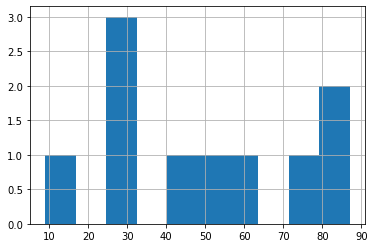

In [54]:
# create a histogram of the column 'air_sensor'
df["name_column1"].hist()

# Step 4: Close the connection to the database

Don't forget to close your connection to the database, once you are done.

In [55]:
conn.commit()
cursor.close()
conn.close()
print("connection closed")

connection closed


# Step 5: Your use-case

You have completed the tutorial and you are now ready to go up and adjust the code according to your use-case. Good Luck :-)